### Howework 4 

**8.12) ROC Curve:** 

In [ ]:
#edits3 

In [24]:
 
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt

In [4]:
# # source = "HW4.ipynb"
# # destination = "UR Masters/DSCC 440 Data Mining/HW4/HW4.ipynb"
# destination_dir = "UR Masters/DSCC 440 Data Mining/HW4/"
# # Move the file
# # shutil.move(source, destination)

# os.chdir(destination_dir)

In [5]:
df=pd.read_excel('ROC_Data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'ROC_Data.xlsx'

In [8]:
df

NameError: name 'df' is not defined

In [260]:
x = np.arange(0, 1, 0.001)


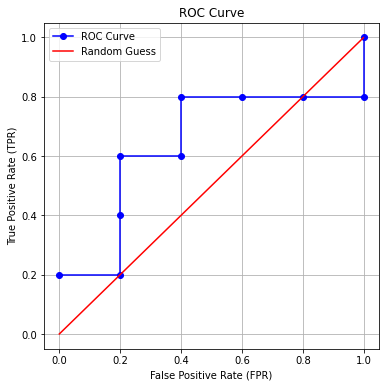

In [261]:
plt.figure(figsize=(6,6));
plt.plot(df.FPR,df.TPR, marker='o', linestyle='-', color='b', label='ROC Curve')
plt.plot(x, x,color='r',label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


**8.14) Comparing  models M1 and M2, given their error rates:**

Is one model significantly better than the other based on an alpha=0.01?

**MANUAL SOLUTION:**

In [9]:
M1=[30.5,32.2,20.7,20.6,31,41,27.7,26,21.5,26]

M2=[22.4,14.5,22.4,19.6,20.7,20.4,22.1,19.4,16.2,35]

In [10]:
alpha=0.01

Here, a paired t-test can be applied with the null hypothesis being:

- **Null Hypothesis (H₀):** $ \mu_1 = \mu_2 $
- **Alternative Hypothesis (H₁):** $ \mu_1 \neq \mu_2 $


In [11]:
mu1=np.mean(M1)
mu2=np.mean(M2)
n=len(M1)

Standart Deviations for a paired sample t test:

In [12]:
#Here we will use n as this is the population we have:
var = (1 / n) * sum([(M1[i] - M2[i] - (mu1 - mu2))**2 for i in range(n)])
print("Variance:", round(var,3))

Variance: 68.123


**t-statistic is given as:**
$$ t=\frac{(\mu_1-\mu_2)-0}{\sqrt\frac{var}{n}}$$

In [13]:
t=(mu1-mu2)/np.sqrt(var/n)
t

2.4712371600876786

In [14]:
dof=n-1

Using the t value and the dof=9 above we should check the critical t-value for the given alpha.  
Here this is **two-sided t-test**!  
**Checking from the tables t critical values  on both ends are:**
$$t_{critical}=\pm{ 3.2498}$$


**Our value t=2.471 is within the Confidence region.Therefore we FAIL TO REJECT the NULL.  
**The two models are not significantly different.**

**SOLVING USING SCIPY:**

In [18]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(M1, M2)
# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in errors between the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in errors between the models.")


T-statistic: 2.344421419296965
P-value: 0.043702633095373596
Fail to reject the null hypothesis: No significant difference in errors between the models.


The reason T-statistic is slighly different here is it used (n-1) in calculating the Var.  
I used the equation 8.32 given in the book.
But the conclusion is the same.

## **Problem 6**

In [19]:
table = {
    'Age': ['<= 25', '<= 25', '26-35', '> 35', '> 35', '26-35', '<= 25', '<= 25', '26-35', '> 35', 
            '<= 25', '26-35', '26-35', '> 35', '> 35'],
    'Income': ['Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'High', 'Medium', 'Medium', 
               'Low', 'High', 'Medium', 'High', 'Medium'],
    'Employed': ['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No','Yes', 
                 'No', 'Yes', 'Yes', 'No','Yes'],
    'Credit Score': ['Fair', 'Excellent', 'Fair', 'Excellent', 'Fair', 'Excellent',  'Fair', 'Fair', 'Excellent','Fair', 'Fair', 
                     'Excellent','Fair', 'Fair', 'Excellent'],
    'Property Owner': ['No', 'Yes','No', 'Yes','No','No', 'No', 'Yes','Yes', 'No','No', 'Yes','Yes', 'No','Yes'],
    'Loan Approved': ['Denied', 'Approved', 'Approved', 'Approved','Denied', 'Approved', 'Denied', 'Approved', 
                      'Approved', 'Approved', 'Denied', 'Approved', 'Approved', 'Denied', 'Approved']
}

# Create DataFrame
df = pd.DataFrame(table)
df


,Age,Income,Employed,Credit Score,Property Owner,Loan Approved
0,<= 25,Low,No,Fair,No,Denied
1,<= 25,High,Yes,Excellent,Yes,Approved
2,26-35,Medium,Yes,Fair,No,Approved
3,> 35,High,Yes,Excellent,Yes,Approved
4,> 35,Low,No,Fair,No,Denied
5,26-35,Low,Yes,Excellent,No,Approved
6,<= 25,Medium,No,Fair,No,Denied
7,<= 25,High,Yes,Fair,Yes,Approved
8,26-35,Medium,No,Excellent,Yes,Approved
9,> 35,Medium,Yes,Fair,No,Approved


In [21]:

# results = {}
# for col in df.columns:
#     if col != 'Loan Approved':
#         # Group by the current column and 'Loan Approved', then get the counts
#         grouped_counts = df.groupby([col, 'Loan Approved']).size().reset_index(name='Counts')
#         # Store the result in the dictionary with the column name as the key
#         results[f'AVC for {col}'] = grouped_counts

# # Results:
# for key, value in results.items():
#     print(f"{key}:")
#     print(value)
#     print()


In [22]:
# Dictionary to store the contingency tables for each feature
avc_tables = {}

for col in df.columns:
    if col != 'Loan Approved':
        # Create a contingency table with Approved and Denied as columns
        table = pd.crosstab(df[col], df['Loan Approved'])
        
        # Store the contingency table in the dictionary
        avc_tables[f'AVC for {col}'] = table

# Display each contingency table
for key, table in avc_tables.items():
    print(f"{key}:")
    print('____________________')
    print(table)
    print()
    


AVC for Age:
____________________
Loan Approved  Approved  Denied
Age                            
26-35                 5       0
<= 25                 2       3
> 35                  3       2

AVC for Income:
____________________
Loan Approved  Approved  Denied
Income                         
High                  4       1
Low                   1       3
Medium                5       1

AVC for Employed:
____________________
Loan Approved  Approved  Denied
Employed                       
No                    1       5
Yes                   9       0

AVC for Credit Score:
____________________
Loan Approved  Approved  Denied
Credit Score                   
Excellent             6       0
Fair                  4       5

AVC for Property Owner:
____________________
Loan Approved   Approved  Denied
Property Owner                  
No                     3       5
Yes                    7       0



## **Problem 7**

**a) Expected entropy:**

In [23]:
df['Loan Approved'].value_counts()

Approved    10
Denied       5
Name: Loan Approved, dtype: int64

In [250]:
p1=10/15
p2=5/15
entropy=-p1*np.log2(p1)-p2*np.log2(p2)
print('Entropy of the data set given= ',entropy)


Entropy of the data set given=  0.9182958340544896


**b) Information needed after first Split based on 'Credit Score':**

In [251]:
df_credit=avc_tables['AVC for Credit Score']
df_credit

Loan Approved,Approved,Denied
Credit Score,,
Excellent,6,0
Fair,4,5


$$
\text{Info}_{\text{credit}}(D) = \left( \frac{6}{15} \right) I(6, 0) + \left( \frac{9}{15} \right) I(4, 5)  $$


In [240]:
branch_prob = np.divide([6,9], 15)
credit_Ipairs = [(6, 0), (4, 5)]

# Calculate entropy for each branch
branch_ent = []
for x, y in credit_Ipairs:
    # Calculate probabilities
    p1 = x / (x + y) if x + y > 0 else 0
    p2 = y / (x + y) if x + y > 0 else 0
    
    # Entropy calculation with zero check
    ent1 = 0
    ent2 = 0
    if p1 > 0:
        ent1 = -p1 * np.log2(p1)
    if p2 > 0:
        ent2 = -p2 * np.log2(p2)
    print(ent1, ent2)
    branch_ent.append(ent1+ent2)

# Calculate Info_credit
info_credit = sum(branch_prob[i] * branch_ent[i] for i in range(len(branch_ent)))

print('Info needed after splitting by Credit Score: ', round(info_credit,3))


-0.0 0
0.5199666673076944 0.4711093925305278
Info needed after splitting by Credit Score:  0.595


**c) Information gain after first Split based on 'Credit Score':**
$$ Info Gain_{Credit Score}=Info(D)-Info_{CreditScore}(D) $$

In [241]:
info_D=entropy
Gain_credit=info_D-info_credit
print('Gain after first splitting on Credit Score= ',round(Gain_credit,3))

Gain after first splitting on Credit Score=  0.324


### **$GAIN_{Credit Score}=0.324$**

**d) Information needed after first split based on 'Income':**

In [244]:
df_income=avc_tables['AVC for Income']
df_income

Loan Approved,Approved,Denied
Income,,
High,4,1
Low,1,3
Medium,5,1


$$ \text{Info}_{\text{income}}(D) = \left( \frac{5}{15} \right) I(4, 1) + \left( \frac{4}{15} \right) I(1, 3) + \left( \frac{6}{15} \right) I(5, 1) $$


In [252]:
branch_prob = np.divide([5, 4,6], 15)
income_Ipairs = [(4,1), (1,3), (5,1)]

# Calculate entropy for each branch
branch_ent = []
for x, y in income_Ipairs:
    # Calculate probabilities
    p1 = x / (x + y) 
    p2 = y / (x + y) 
    # Entropy calculation with zero check
    ent1 = 0
    ent2 = 0
    if p1 > 0:
        ent1 = -p1 * np.log2(p1)
    if p2 > 0:
        ent2 = -p2 * np.log2(p2)
    print(ent1, ent2)
    branch_ent.append(ent1+ent2)


# Calculate Info_credit
info_income = sum(branch_prob[i] * branch_ent[i] for i in range(len(branch_ent)))

print('Info needed after splitting by In Income: ', round(info_income,3))

0.2575424759098898 0.46438561897747244
0.5 0.31127812445913283
0.21919533819482817 0.430827083453526
Info needed after splitting by In Income:  0.717


**e) Information gain after first Split based on 'INCOME':**
$$ Info Gain_{Income}=Info(D)-Info_{Income}(D) $$

In [253]:

Gain_income=info_D-info_income
print('Gain after first splitting on Income= ',round(Gain_income,3))

Gain after first splitting on Income=  0.201


### **$GAIN_{Income}=0.201$**

**f) Based on these splits, CREDIT SCORE splits result in more GAIN than INCOME.So would pick CREDIT SCORE before Income.**

In [268]:
np.log10(100)

2.0

In [270]:
np.log(0.01),np.log(0.99)

(-4.605170185988091, -0.01005033585350145)